## Observations and Insights 

1. There is a positive correlation between the tumor volume and mouse weight. The higher the weight, the greater volume the tumor may grow to. 

2. As a whole, the data provided points to an extremely large variance which means there was a large difference in each tumor volume. 

3. Capumolin and Ramicane had the highest cadidate counts, as well the lowest variance. They are also the ones that  produced the outliers for Tumor Volume (mm3). 


In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata,study_results,how='outer',on=['Mouse ID'])
# Display the data table for preview
merged_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [99]:
# Checking the number of mice.
mice_count_df=len(merged_df['Mouse ID'].unique())
mice_count_df

249

In [100]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df=merged_df.loc[merged_df.duplicated(['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mice_df

array(['g989'], dtype=object)

In [101]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df=merged_df.loc[merged_df['Mouse ID']=='g989',:]
g989_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [102]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# issues with drop_duplicates, drop, del, isin allowed to call 'g989', need to verify dropped all 
# records since value in cleaned_count_df is only 1 different not 2 for both being deleted. 
# revisit drop and del methods with calling duplicate_mice_df 

cleaned_df=merged_df[merged_df['Mouse ID'].isin(duplicate_mice_df)==False]

cleaned_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [103]:
# Checking the number of mice in the clean DataFrame.
cleaned_count_df=len(cleaned_df['Mouse ID'].unique())
cleaned_count_df

248

## Summary Statistics

In [135]:
cleaned_df.groupby(['Drug Regimen']).count()

Mouse ID  Sex  Age_months  Weight (g)  Timepoint  \
Drug Regimen                                                     
Capomulin          230  230         230         230        230   
Ceftamin           178  178         178         178        178   
Infubinol          178  178         178         178        178   
Ketapril           188  188         188         188        188   
Naftisol           186  186         186         186        186   
Placebo            181  181         181         181        181   
Propriva           148  148         148         148        148   
Ramicane           228  228         228         228        228   
Stelasyn           181  181         181         181        181   
Zoniferol          182  182         182         182        182   

              Tumor Volume (mm3)  Metastatic Sites  
Drug Regimen                                        
Capomulin                    230               230  
Ceftamin                     178               178  
Infubinol                    178               178  
Ketapril                     188               188  
Naftisol                     186               186  
Placebo                      181               181  
Propriva                     148               148  
Ramicane                     228               228  
Stelasyn                     181               181  
Zoniferol                    182               182

In [160]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# tumor_vol doesn't work when doing groupby cause only calls the one column so there is no 'Drug Regimen'
# reapproach
# tumor_vol=cleaned_df['Tumor Volume (mm3)']

# tumor_mean=np.mean(tumor_vol) 
# tumor_median=np.median(tumor_vol)
# tumor_variance=np.var(tumor_vol)
# tumor_stdev=np.std(tumor_vol)
# tumor_sem=tumor_vol.sem()

# print(tumor_vol)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# tumor_mean=cleaned_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
# tumor_median=cleaned_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
# tumor_groups=cleaned_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
# tumor_std=cleaned_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
# tumor_sem=cleaned_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

tumor_groups=cleaned_df.groupby(['Drug Regimen'])

tumor_mean=tumor_groups['Tumor Volume (mm3)'].mean()
tumor_median=tumor_groups['Tumor Volume (mm3)'].median()
tumor_var=tumor_groups['Tumor Volume (mm3)'].var()
tumor_stdev=tumor_groups['Tumor Volume (mm3)'].std()
tumor_sem=tumor_groups['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe. use to_frame() 
# so the .merge works as data frame not series

mean_median_merge=tumor_mean.to_frame().merge(tumor_median,how='outer',on='Drug Regimen')
mean_median_merge=mean_median_merge.rename(columns={'Tumor Volume (mm3)_x':'Mean','Tumor Volume (mm3)_y':'Median'})
mm_var_merge=mean_median_merge.merge(tumor_var,how='outer',on='Drug Regimen')
mm_var_merge=mm_var_merge.rename(columns={'Tumor Volume (mm3)':'Variance'})
mmv_std_merge=mm_var_merge.merge(tumor_stdev,how='outer',on='Drug Regimen')
mmv_std_merge=mmv_std_merge.rename(columns={'Tumor Volume (mm3)':'Std Dev'})
mmvs_sem_merge=mmv_std_merge.merge(tumor_sem,how='outer',on='Drug Regimen')
mmvs_sem_merge=mmvs_sem_merge.rename(columns={'Tumor Volume (mm3)':'SEM'})


#print final merge
mmvs_sem_merge



Mean     Median   Variance   Std Dev       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_sum_stats=cleaned_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
agg_sum_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Candidate Count')

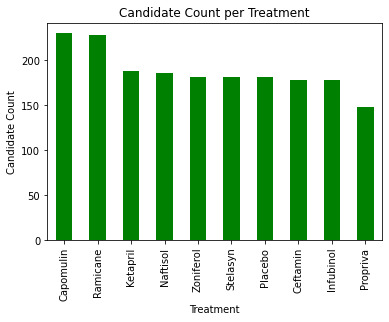

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_count=cleaned_df['Drug Regimen'].value_counts()
measurements_chart=measurements_count.plot(kind="bar",title="Candidate Count per Treatment",color='green')
measurements_chart.set_xlabel("Treatment")
measurements_chart.set_ylabel("Candidate Count")


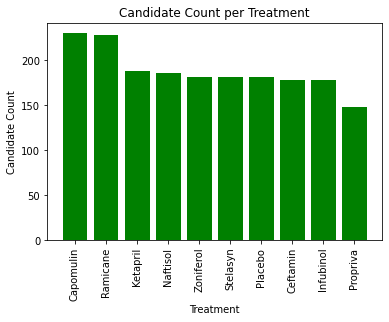

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measurements_df=cleaned_df['Drug Regimen']

#set axes
x_axis=measurements_count.index.values
y_axis=measurements_count.values

#set plt to bar, and add some formatting
plt.bar(x_axis,y_axis,color='green')

#add labels and rotate drug names so do not overlap
plt.title("Candidate Count per Treatment")
plt.xlabel("Treatment")
plt.ylabel("Candidate Count")
plt.xticks(rotation="vertical")

#show chart
plt.show()

<AxesSubplot:title={'center':'Gender Statistics'}, ylabel='Sex'>

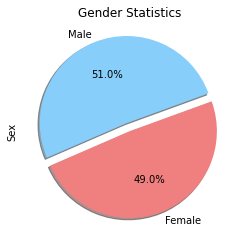

In [113]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#dataframe values
gender_pie=cleaned_df['Sex'].value_counts()


gender_pie_df=({
    "Gender Statistics":gender_pie
})

#plot the pie
pie_plot=gender_pie.plot.pie(ylabel='Sex',title='Gender Statistics',explode=[0.1,0],colors=['lightskyblue','lightcoral'],shadow=True,
                            autopct="%1.1f%%",startangle=20)

#show
pie_plot

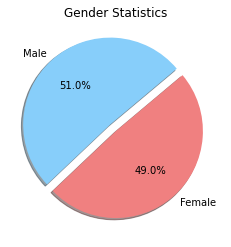

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#labels for pie chart
gender_labels=['Male','Female']

#values
gender_pie=cleaned_df['Sex'].value_counts()

#colors
colors=['lightskyblue','lightcoral']

#explode
explode=[0.1,0]

#plot the pie
plt.pie(gender_pie,explode=explode,labels=gender_labels,colors=colors,autopct="%1.1f%%",
        shadow=True,startangle=40)
plt.title("Gender Statistics")

#show
plt.show()


## Quartiles, Outliers and Boxplots

In [165]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# see notes above
max_timepoint=cleaned_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_clean_df=pd.merge(max_timepoint,cleaned_df,on=['Mouse ID','Timepoint'])

# Show df
merged_clean_df

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
243     z435         10     Propriva  Female          12          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   
246     z795         45     Naftisol  Female          13          29   
247     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2             70.717621                 4  
3             62.999356                 3  
4             63.440686                 1  
..                  ...               ...  
243           48.710661                 0  
244           30.638696                 0  
245           62.754451                 3  
246           65.741070                 3  
247           73.867845                 4  

[248 rows x 8 columns]

In [166]:
cleaned_count_df=len(merged_clean_df['Mouse ID'].unique())
cleaned_count_df

248

In [170]:
# Put treatments into a list for for loop (and later for plot labels)
# both will be needed to finish out the line graphs
capomulin_df=merged_clean_df.loc[merged_clean_df['Drug Regimen']=='Capomulin',:]
capomulin_vol=capomulin_df['Tumor Volume (mm3)']
ramicane_df=merged_clean_df.loc[merged_clean_df['Drug Regimen']=='Ramicane',:]
ramicane_vol=ramicane_df['Tumor Volume (mm3)']
infubinol_df=merged_clean_df.loc[merged_clean_df['Drug Regimen']=='Infubinol',:]
infubinol_vol=infubinol_df['Tumor Volume (mm3)']
ceftamin_df=merged_clean_df.loc[merged_clean_df['Drug Regimen']=='Ceftamin',:]
ceftamin_vol=ceftamin_df['Tumor Volume (mm3)']

# Create empty list to fill with tumor vol data (for plotting)

vol_data=[]
for i in range(len(merged_clean_df)):
    data = merged_clean_df.loc[i,['Drug Regimen','Tumor Volume (mm3)']]
    vol_data.append(data)
vol_data


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# quartiles = vol_data.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq
    
#     # Locate the rows which contain mice on each drug and get the tumor volumes

    
#     # add subset 
    
    
#     # Determine outliers using upper and lower bounds
# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)  
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

[Drug Regimen          Infubinol
 Tumor Volume (mm3)      67.9734
 Name: 0, dtype: object,
 Drug Regimen          Infubinol
 Tumor Volume (mm3)      65.5257
 Name: 1, dtype: object,
 Drug Regimen          Placebo
 Tumor Volume (mm3)    70.7176
 Name: 2, dtype: object,
 Drug Regimen          Ceftamin
 Tumor Volume (mm3)     62.9994
 Name: 3, dtype: object,
 Drug Regimen          Stelasyn
 Tumor Volume (mm3)     63.4407
 Name: 4, dtype: object,
 Drug Regimen          Zoniferol
 Tumor Volume (mm3)      66.7942
 Name: 5, dtype: object,
 Drug Regimen          Ramicane
 Tumor Volume (mm3)     38.4076
 Name: 6, dtype: object,
 Drug Regimen          Ramicane
 Tumor Volume (mm3)     43.0475
 Name: 7, dtype: object,
 Drug Regimen          Ketapril
 Tumor Volume (mm3)     49.7834
 Name: 8, dtype: object,
 Drug Regimen          Stelasyn
 Tumor Volume (mm3)      60.122
 Name: 9, dtype: object,
 Drug Regimen          Ramicane
 Tumor Volume (mm3)     38.8104
 Name: 10, dtype: object,
 Drug Regimen   

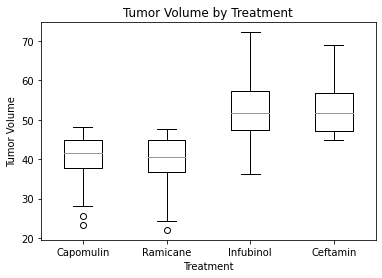

In [97]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drug_plots=[capomulin_vol,ramicane_vol,infubinol_vol,ceftamin_vol]
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

fig1, ax1=plt.subplots()
ax1.set_title('Tumor Volume by Treatment')
ax1.set_xlabel('Treatment')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(drug_plots,labels=drugs)
plt.show()

## Line and Scatter Plots

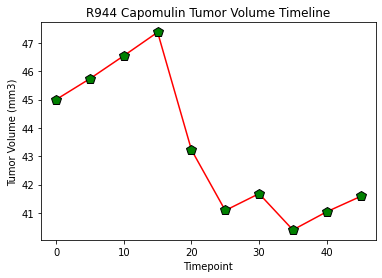

In [46]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_r944=capomulin_df.loc[capomulin_df['Mouse ID']=='r944']

x_axe=line_r944['Timepoint']
y_axe=line_r944['Tumor Volume (mm3)']
plt.plot(x_axe,y_axe,marker='p',markersize=10,color='red', markerfacecolor='green',
         markeredgecolor='black')
plt.title('R944 Capomulin Tumor Volume Timeline')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


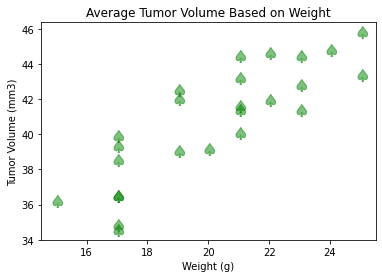

In [59]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#get all capomuline_df values set as mean
avg_capomulin=capomulin_df.groupby(['Mouse ID']).mean()

#plot the scatter with using the different indexs for Tumor Volume (mm3) and Weight (g)
plt.scatter(avg_capomulin['Weight (g)'],avg_capomulin['Tumor Volume (mm3)'],
            s=150,alpha=.5,color='g',marker=r'$\spadesuit$')
#
plt.title('Average Tumor Volume Based on Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()



## Correlation and Regression

In [61]:
# Calculate the correlation coefficient for mouse weight and 
# average tumor volume for the Capomulin regimen
avg_wgt_cap=avg_capomulin['Weight (g)']
avg_tum_cap=avg_capomulin['Tumor Volume (mm3)'] 
correlation=sem.pearsonr(avg_wgt_cap,avg_tum_cap)

print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The Slope is: 0.95
The intercept is: 21.55
The r squared is: 0.71
The p value is: 1.32e-07
The standard error is: 0.128
The linear equation is:y = 0.95x + 21.55


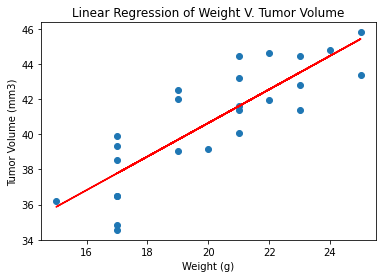

In [84]:
#Calculate the  linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

x_values = avg_capomulin['Weight (g)']
y_values = avg_capomulin['Tumor Volume (mm3)'] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(0,25),fontsize=15,color="cyan") ##messing with formatting moved to print statement

#set title, xlabel, and ylabel
plt.title('Linear Regression of Weight V. Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
# print the slope, intercept, rvalue, pvalue, stderr, line_eq and show plot 
print(f"The Slope is: {round(slope,2)}")
print(f"The intercept is: {round(intercept,2)}")
print(f"The r squared is: {round(rvalue**2,2)}")
print(f"The p value is: {round(pvalue,9)}")
print(f"The standard error is: {round(stderr,3)}")
print(f"The linear equation is:{line_eq}")
plt.show()